# **RNN on Amazon Products reviews**

**Goal:** Classify The reviews as Positive or negative

In [88]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing Dataset from Kaggle**

In [89]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"akrambusiness","key":"3b00820d5658b305a9386288c07227f0"}'}

In [90]:
#Upload Your kaggle Json file
#We configure the path of kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [91]:
#Importing  the dataset
!kaggle datasets download -d datafiniti/consumer-reviews-of-amazon-products

consumer-reviews-of-amazon-products.zip: Skipping, found more recently modified local copy (use --force to force download)


In [92]:
#xtracting the compressed Dataset
from zipfile import ZipFile
data = '/content/consumer-reviews-of-amazon-products.zip'
with ZipFile(data,'r') as zip:
  zip.extractall()
  print("Dataset is extracted")

Dataset is extracted


In [93]:
data

'/content/consumer-reviews-of-amazon-products.zip'

**Importing libraries**

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.corpus import stopwords

In [95]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## **EDA**

In [96]:
#Read dataset
df = pd.read_csv('/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [97]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [98]:
df.shape

(28332, 24)

In [99]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,4.100000e+01,16115.000000,28332.000000
mean,1.840066e+08,0.529321,4.514048
std,2.337036e+07,9.345017,0.934957
min,1.116244e+08,0.000000,1.000000
25%,1.843344e+08,0.000000,4.000000
50%,1.885078e+08,0.000000,5.000000
75%,1.988160e+08,0.000000,5.000000
max,2.085304e+08,621.000000,5.000000


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [101]:
df['reviews.rating'].unique()

array([3, 4, 5, 1, 2])

In [102]:
df['brand'].unique()

array(['Amazonbasics', 'Amazon', 'AmazonBasics'], dtype=object)

In [103]:
df['manufacturer'].unique()

array(['AmazonBasics', 'Amazon', 'Amazon Digital Services', 'Amazon.com'],
      dtype=object)

We will include in our new data jutst what we need for our processing, instead of using drop function on our data

In [104]:
final = df[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]
print(final.isnull().sum()) #Checking for null values

reviews.rating      0
reviews.text        0
reviews.title       0
reviews.username    0
dtype: int64


So we have no issue with null values, because our columns are free from any null values

Now we have the data to work with. However, as our goal is to predict sentiment — whether review is positive or negative, we have to select appropriate data for this task.

In [105]:
final.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang
1,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG
2,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert
3,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson
4,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda


In [106]:
review=pd.DataFrame(final.groupby('reviews.rating').size().sort_values(ascending=False).rename('No. of Users').reset_index())
review.head()

,reviews.rating,No. of Users
0,5,19897
1,4,5648
2,3,1206
3,1,965
4,2,616


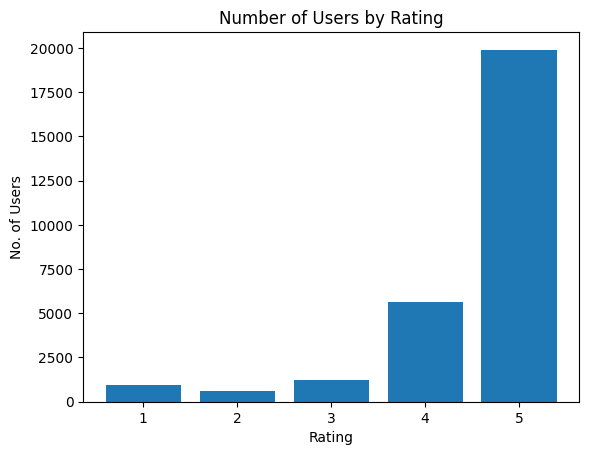

In [107]:
# Create a bar plot
plt.bar(review['reviews.rating'], review['No. of Users'])
plt.xlabel('Rating')
plt.ylabel('No. of Users')
plt.title('Number of Users by Rating')
plt.show()

We notice that we have unbalanced distribution of reviews per rating, we will try to make less unbalanced, so that's why I made the reviews of 5 stars rating for the "positive" (1)class while the 4,3,2 and 1 for "negative" (0) class, by using a list comprehension

In [108]:
final['Sentiment'] = final['reviews.rating'].apply(lambda x: 1 if x > 4 else 0)

<ipython-input-108-237253e7af4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Sentiment'] = final['reviews.rating'].apply(lambda x: 1 if x > 4 else 0)


In [109]:
final['Sentiment']

0        0
1        0
2        1
3        1
4        1
        ..
28327    1
28328    0
28329    1
28330    1
28331    0
Name: Sentiment, Length: 28332, dtype: int64

<Axes: >

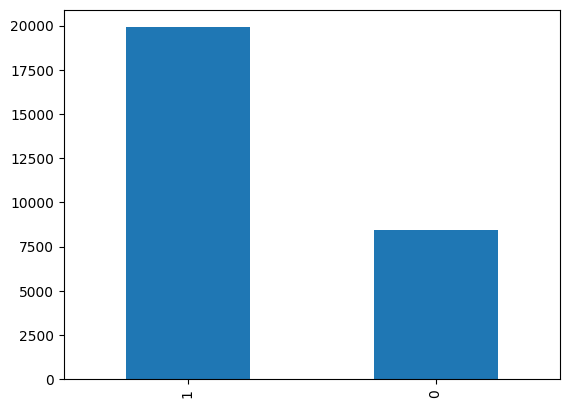

In [110]:
#We plot our reviews per class
final['Sentiment'].value_counts().plot.bar()

The data is unbalanced which will create a problem for our model, but we will use it anyway

## **Cleaning Text**

In [111]:
#cleaning function

In [112]:
def clean_reviews(review_text):
    '''
    Takes in a review, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in review_text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [113]:
clean_reviews('I order 3 of them and one of the item is bad q.')

['order', '3', 'one', 'item', 'bad', 'q']

In [114]:
# We apply the cleaning function to the whole column of reviews
final["Review_Clean"] = final["reviews.text"].apply(clean_reviews)

<ipython-input-114-7214c842f0e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final["Review_Clean"] = final["reviews.text"].apply(clean_reviews)


In [115]:
final.head()

,reviews.rating,reviews.text,reviews.title,reviews.username,Sentiment,Review_Clean
0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,0,"[order, 3, one, item, bad, quality, missing, b..."
1,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,0,"[Bulk, always, less, expensive, way, go, produ..."
2,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,1,"[Well, Duracell, price, happy]"
3,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,1,"[Seem, work, well, name, brand, batteries, muc..."
4,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,1,"[batteries, long, lasting, price, great]"


## **Preparing our data**

RNN input requires array data type, therefore we define the target variable "Sentiment" as y and "Review_Clean" as X

In [116]:
X, y = (final['Review_Clean'].values, final['Sentiment'].values)

In [117]:
#Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=  0.3)

In [119]:
print(" Shape of X_train",X_train.shape)
print(" Shape of y_train",y_train.shape)

print(" Shape of X_test",y_train.shape)
print(" Shape of y_test",y_test.shape)

 Shape of X_train (19832,)
 Shape of y_train (19832,)
 Shape of X_test (19832,)
 Shape of y_test (8500,)


Text data has to be integer encoded before feeding it into the RNN model, for that we use word embedding

In [120]:
#Using the tokenizer class
from keras.preprocessing.text import Tokenizer
#from keras_preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences

tk = Tokenizer(lower = True)
tk.fit_on_texts(X_train)
tk.fit_on_texts(X_test)

In [121]:
X_train_seq = tk.texts_to_sequences(X_train) #convert our text to sequence of numbers
X_train_pad = pad_sequences(X_train_seq, maxlen=100, padding='post') #ensure that all reviews have the same length

In [122]:
X_test_seq = tk.texts_to_sequences(X_test) 
X_test_pad = pad_sequences(X_test_seq, maxlen=100, padding='post')

**Original review vs after tokenization and sequencing**

In [123]:
print(X_train[100])
X_train_seq[100]

['kids', 'really', 'enjoy', 'play', 'hours', 'Keeps', 'occupied']


[13, 36, 204, 46, 209, 293, 1177]

In [124]:
X_train_seq[1]
X_train_seq[100]

[13, 36, 204, 46, 209, 293, 1177]

**Reviews after padding**

In [125]:
X_train_pad[1]

array([2647,   74,    2,  300, 1144,  555,   25,  652,  475, 1542,  666,
       3978,  606,   46,  517,    2,  515,   15,   18,  411, 1904,  487,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [126]:
X_train_pad[100]

array([  13,   36,  204,   46,  209,  293, 1177,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

As you notice the two vectors have the same length after applying padding, so every review with the same length

## **RNN Model**

In [127]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, SimpleRNN
from keras import optimizers
from keras.losses import categorical_crossentropy

In [ ]:
#Reshaping our training dataset
X_train = np.array(X_train_pad).reshape((X_train_pad.shape[0], X_train_pad.shape[1],1))
print(X_train.shape)

In [129]:
X_test = np.array(X_test_pad).reshape((X_test_pad.shape[0], X_test_pad.shape[1],1))
print(X_test.shape)

(8500, 100, 1)


In [130]:
# Convert labels to categorical format
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [131]:
#Building the model
num_classes = 2 #We have two output classes 0 or 1
maxlen = 100

def vanilla_rnn():
  model = Sequential()

  model.add(SimpleRNN(50, input_shape = (maxlen,1), return_sequences= False))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  model.summary()

  adam = optimizers.Adam(lr = 0.001)
  model.compile(loss = categorical_crossentropy,optimizer =adam, metrics = ['accuracy'])

  return model



In [132]:
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn = vanilla_rnn, epochs = 5, batch_size =50)
model.fit(X_train, y_train)

<ipython-input-132-30d0a04cd8b7>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = vanilla_rnn, epochs = 5, batch_size =50)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_7 (Dense)             (None, 2)                 102       
                                                                 
 activation_5 (Activation)   (None, 2)                 0         
                                                                 
Total params: 2,702
Trainable params: 2,702
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


397/397 [==============================] - 22s 52ms/step - loss: 0.6125 - accuracy: 0.7001
Epoch 2/5
397/397 [==============================] - 11s 28ms/step - loss: 0.6112 - accuracy: 0.7002
Epoch 3/5
397/397 [==============================] - 9s 23ms/step - loss: 0.6113 - accuracy: 0.7005
Epoch 4/5
397/397 [==============================] - 11s 29ms/step - loss: 0.6115 - accuracy: 0.6999
Epoch 5/5
397/397 [==============================] - 9s 22ms/step - loss: 0.6114 - accuracy: 0.7000


**Testing on new input**

In [133]:
#a = ["I love the product"]
a = ["I order 3 of them and one of the item is bad "]
tk_input = Tokenizer(lower = True)
tk_input.fit_on_texts(a)

a = tk_input.texts_to_sequences(a) 
a = np.array(a)

a = pad_sequences(a,padding='post', maxlen = maxlen)

a = a.reshape((a.shape[0], a.shape[1], 1))
print(a.shape)

prediction = model.predict(np.array(a))
print(prediction)

(1, 100, 1)
1/1 [==============================] - 0s 144ms/step
[1]
